In [2]:
import torch
from torchvision import transforms, datasets
BATCH_SIZE = 64

trainset = datasets.FashionMNIST(
    root      = '../data/FASHIONMNIST/', 
    train     = True,
    download  = True,
    transform = transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
    num_workers = 2
)

In [3]:
from torch import nn, optim

class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()

print("Model: ", model)
print("Device: ", DEVICE)

Model:  AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device:  cuda


In [4]:
view_data = trainset.data[:5].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor) / 255.

In [5]:
# Definite Train & Evaluate
def train(model, train_loader, optimizer):
    model.train()
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28 * 28).to(DEVICE)
        y = x.view(-1, 28 * 28).to(DEVICE)
        label = label.to(DEVICE)
        
        encoded, decoded = model(x)
        loss = criterion(decoded, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(epoch, step * len(x), len(train_loader.dataset), 100. * step / len(train_loader), loss.item()))

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.014147
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.012927
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.014755
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.014766
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.012944
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.017758
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.015473
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.014259
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.013696
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.014431
[Epoch 1]


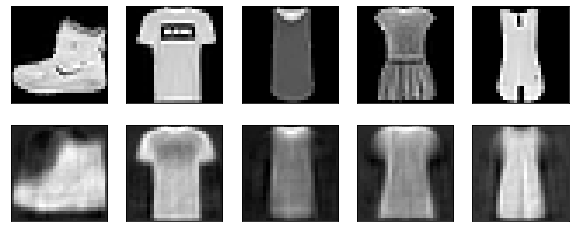

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.013515
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.012807
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.014233
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.014237
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.014033
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.014053
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.013010
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.017060
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.013256
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.014779
[Epoch 2]


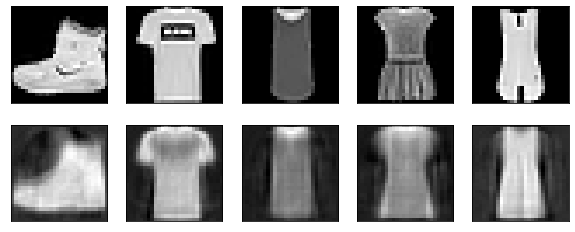

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.013111
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.012857
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.014837
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.013474
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.014714
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.013552
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.013592
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.013968
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.014526
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.014200
[Epoch 3]


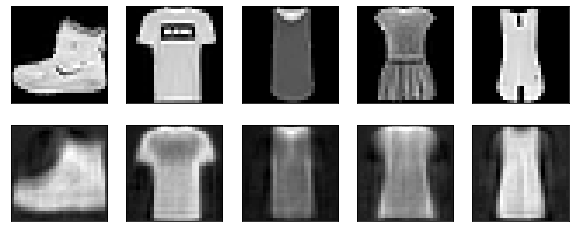

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.013321
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.012325
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.012933
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.012816
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.013091
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.013622
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.013943
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.013016
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.014471
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.015003
[Epoch 4]


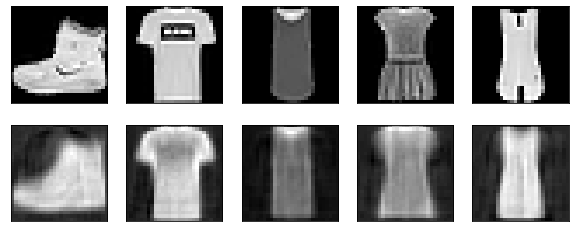

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.014054
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.012928
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.013712
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.012908
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.017420
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.015000
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.014671
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.013027
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.014513
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.014405
[Epoch 5]


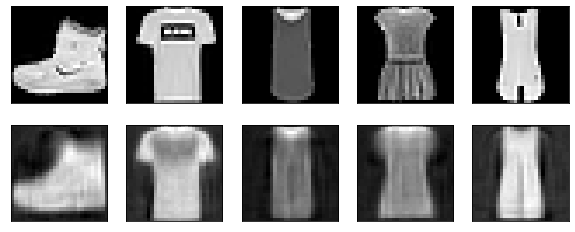

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.013552
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.012583
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.016453
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.015358
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.013387
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.014846
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.016468
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.013001
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.012058
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.015451
[Epoch 6]


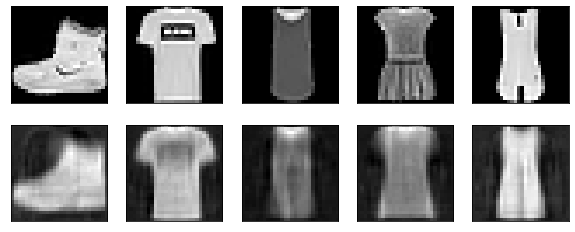

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.014303
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.016021
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.012143
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.012802
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.014784
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.012925
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.014068
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.013915
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.014047
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.013360
[Epoch 7]


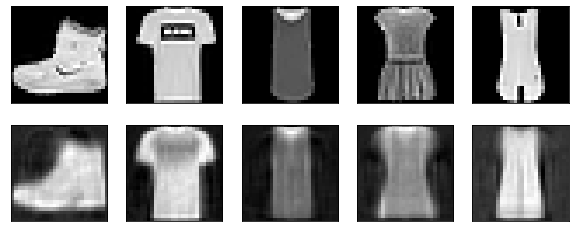

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.014040
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.012089
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.013495
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.013626
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.013474
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.014055
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.013093
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.013284
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.014081
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.014586
[Epoch 8]


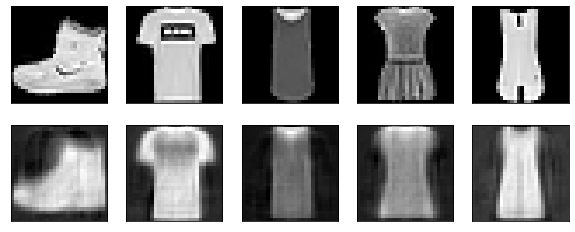

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.012514
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.013509
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.014812
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.014151
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.012793
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.014119
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.013337
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.013255
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.014190
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.014760
[Epoch 9]


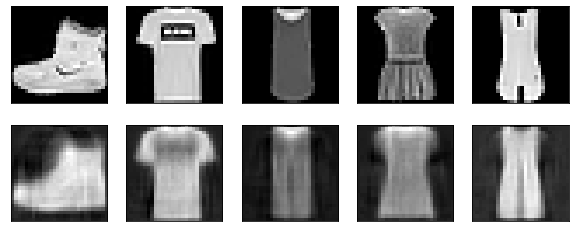

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.014523
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.014428
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.012935
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.013262
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.015106
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.014466
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.013715
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.014666
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.014529
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.013289
[Epoch 10]


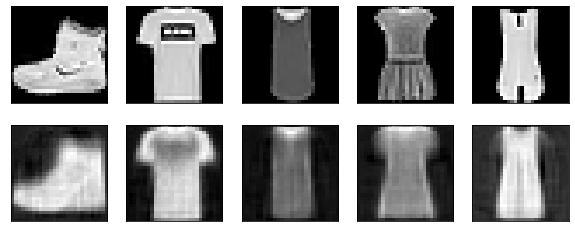

In [7]:
''' Training'''
import numpy as np
import matplotlib.pyplot as plt

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_x = view_data.to(DEVICE)
    encoded_data, decoded_data = model(test_x)
    f, a = plt.subplots(2, 5, figsize = (10, 4))
    print("[Epoch {}]".format(epoch))
    for idx in range(5):
        img = np.reshape(view_data.data.numpy()[idx], (28, 28))
        a[0][idx].imshow(img, cmap = "gray")
        a[0][idx].set_xticks(())
        a[0][idx].set_yticks(())
        
    for idx in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[idx], (28, 28))
        a[1][idx].imshow(img, cmap = "gray")
        a[1][idx].set_xticks(())
        a[1][idx].set_yticks(())
    plt.show()

Model:  AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device:  cuda
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.269715
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.043985
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.037248
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.032488
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.025312
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.024682
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.023626
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.023975
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.021574
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.021108
[Epoch 1]


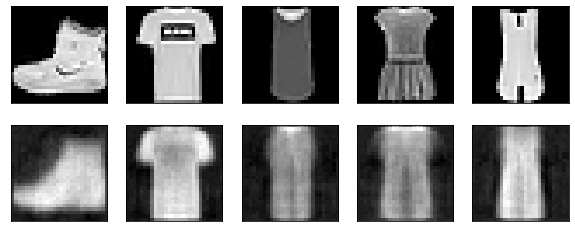

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.021788
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.020815
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.020500
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.018060
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.019765
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.018350
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.018449
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.016409
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.014649
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.016067
[Epoch 2]


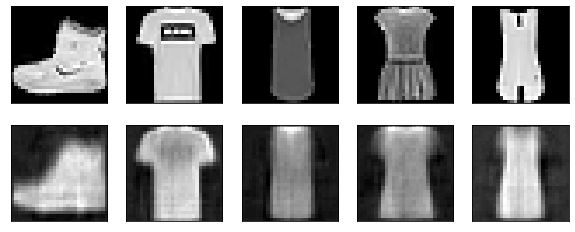

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.016805
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.014662
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.014806
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.014756
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.016134
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.013184
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.013651
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.014535
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.015302
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.015563
[Epoch 3]


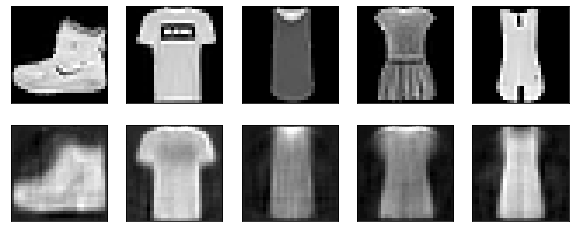

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.014497
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.015422
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.015350
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.014450
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.013226
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.015193
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.013400
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.013188
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.012520
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.013239
[Epoch 4]


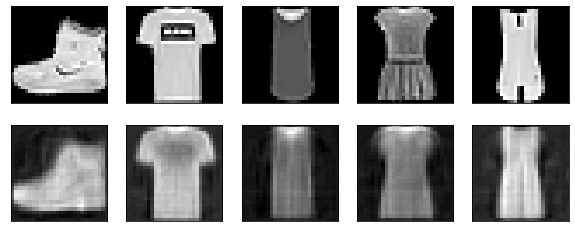

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.013025
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.012978
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.011420
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.012427
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.013750
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.012822
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.011823
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.011372
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.012506
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.012422
[Epoch 5]


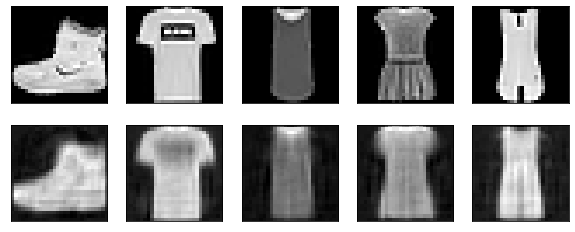

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.012668
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.011642
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.011630
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.011659
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.011408
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.011563
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.012014
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.012409
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.011897
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.012583
[Epoch 6]


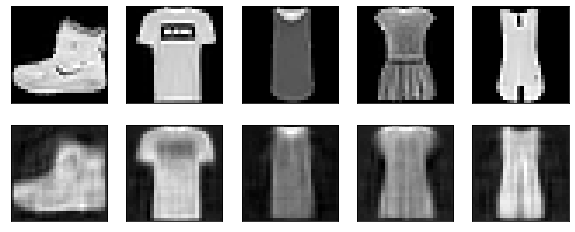

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.011309
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.012441
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.011793
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.011152
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.013445
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.012367
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.012255
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.010715
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.010894
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.011292
[Epoch 7]


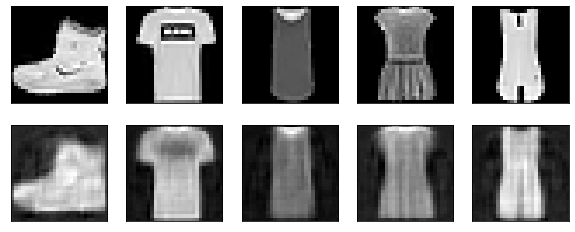

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.011290
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.012244
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.011558
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.012282
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.009844
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.010268
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.010427
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.011760
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.011437
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.010502
[Epoch 8]


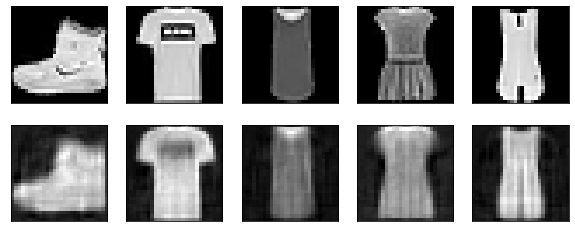

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.010959
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.011702
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.012264
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.009668
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.011863
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.009855
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.010115
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.011528
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.010459
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.010380
[Epoch 9]


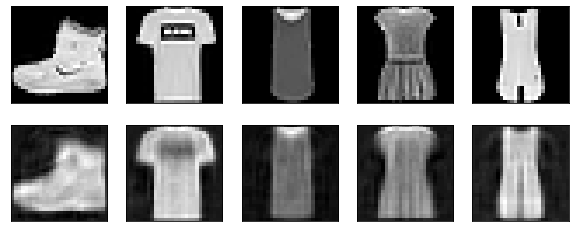

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.010478
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.010660
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.009951
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.011021
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.010763
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.011023
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.010662
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.011905
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.011139
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.011206
[Epoch 10]


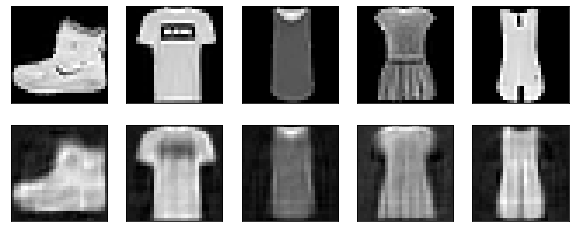

In [8]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.Sigmoid(),
            nn.Linear(128, 28*28),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()

print("Model: ", model)
print("Device: ", DEVICE)

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_x = view_data.to(DEVICE)
    encoded_data, decoded_data = model(test_x)
    f, a = plt.subplots(2, 5, figsize = (10, 4))
    print("[Epoch {}]".format(epoch))
    for idx in range(5):
        img = np.reshape(view_data.data.numpy()[idx], (28, 28))
        a[0][idx].imshow(img, cmap = "gray")
        a[0][idx].set_xticks(())
        a[0][idx].set_yticks(())
        
    for idx in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[idx], (28, 28))
        a[1][idx].imshow(img, cmap = "gray")
        a[1][idx].set_xticks(())
        a[1][idx].set_yticks(())
    plt.show()

Model:  AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device:  cuda
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.203734
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.026922
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.021212
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.018409
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.017295
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.015923
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.016947
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.014527
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.016232
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.013253
[Epoch 1]


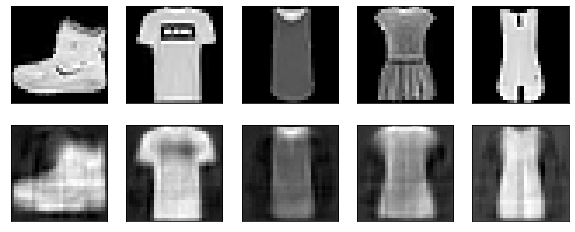

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.015068
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.015940
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.012862
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.015061
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.014492
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.013189
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.014255
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.013768
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.012787
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.012375
[Epoch 2]


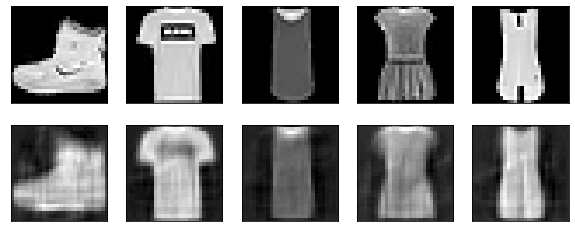

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.012446
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.012751
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.012818
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.013075
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.012915
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.011852
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.011072
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.012212
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.011514
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.014042
[Epoch 3]


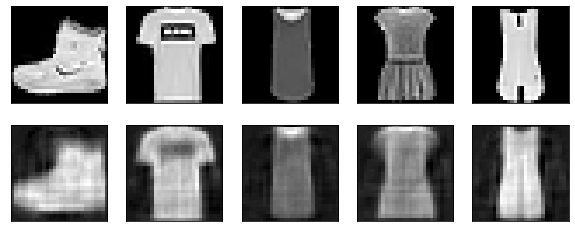

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.013467
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.013031
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.012587
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.012561
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.014195
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.012720
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.011321
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.011056
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.013409
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.013111
[Epoch 4]


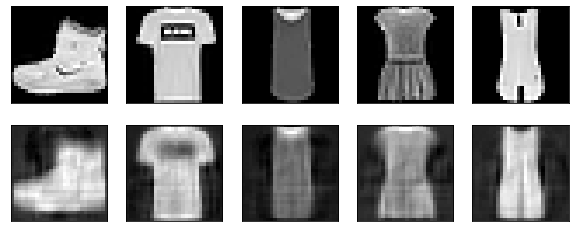

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.013734
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.011759
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.011558
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.011389
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.011841
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.012733
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.012224
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.012598
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.013377
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.013022
[Epoch 5]


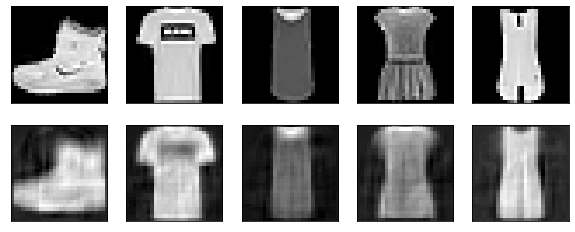

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.010498
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.012216
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.013771
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.012989
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.012462
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.013087
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.012339
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.013246
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.012166
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.012127
[Epoch 6]


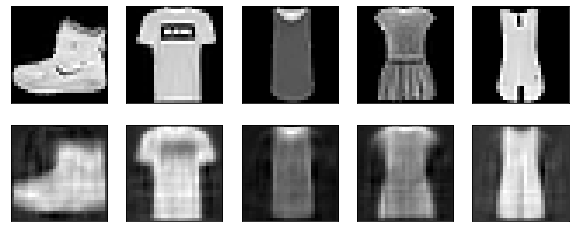

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.014170
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.013167
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.013333
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.011982
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.012827
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.010721
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.013097
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.012430
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.015024
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.011721
[Epoch 7]


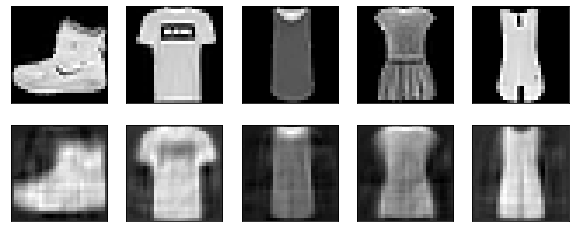

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.014238
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.011776
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.011554
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.011806
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.012668
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.012953
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.011227
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.010240
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.012003
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.013348
[Epoch 8]


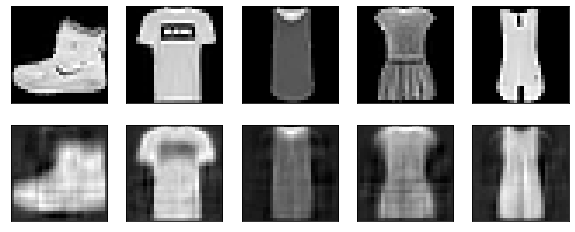

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.012433
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.010925
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.013850
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.014427
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.012270
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.011573
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.012604
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.013940
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.013488
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.013759
[Epoch 9]


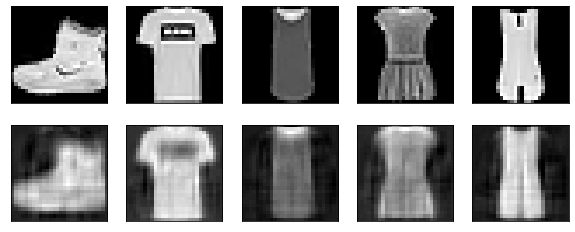

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.013270
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.012919
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.012671
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.012238
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.013012
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.014973
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.012722
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.014172
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.012427
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.012611
[Epoch 10]


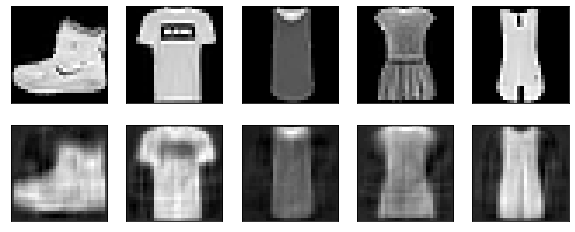

In [9]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()

print("Model: ", model)
print("Device: ", DEVICE)

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_x = view_data.to(DEVICE)
    encoded_data, decoded_data = model(test_x)
    f, a = plt.subplots(2, 5, figsize = (10, 4))
    print("[Epoch {}]".format(epoch))
    for idx in range(5):
        img = np.reshape(view_data.data.numpy()[idx], (28, 28))
        a[0][idx].imshow(img, cmap = "gray")
        a[0][idx].set_xticks(())
        a[0][idx].set_yticks(())
        
    for idx in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[idx], (28, 28))
        a[1][idx].imshow(img, cmap = "gray")
        a[1][idx].set_xticks(())
        a[1][idx].set_yticks(())
    plt.show()

In [10]:
# !pip install lightgbm
# !pip install time
import time
import lightgbm as lgb
from sklearn.metrics import accuracy_score
start = time.time() 
lgb_dtrain = lgb.Dataset(data = trainset.train_data.view(-1, 28 * 28).numpy(), label = list(trainset.train_labels.numpy()))
lgb_param = {'max_depth': 10,
            'learning_rate': 0.001,
            'n_estimators': 20,
            'objective': 'multiclass',
            'num_class': len(set(list(trainset.train_labels.numpy()))) + 1}

num_round = 10000
lgb_model = lgb.train(params = lgb_param, num_boost_round = num_round, train_set = lgb_dtrain) 
lgb_model_predict = np.argmax(lgb_model.predict(trainset.train_data.view(-1, 28 * 28).numpy()), axis = 1) 
print("Accuracy: %.2f" % (accuracy_score(list(trainset.train_labels.numpy()), lgb_model_predict) * 100), "%") 
print("Time: %.2f" % (time.time() - start), "seconds")

c:\users\justin\venv\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\users\justin\venv\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\users\justin\venv\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Accuracy: 82.84 %
Time: 19.64 seconds


In [11]:
trainset.train_labels.numpy()

array([9, 0, 0, ..., 3, 0, 5], dtype=int64)

In [12]:
trainset.train_data.view(-1, 28 * 28).numpy()[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [13]:
train_encoded_x = trainset.train_data.view(-1, 28 * 28).to(DEVICE)
train_encoded_x = train_encoded_x.type(torch.FloatTensor)
train_encoded_x = train_encoded_x.to(DEVICE)
encoded_data, decoded_data = model(train_encoded_x)
encoded_data = encoded_data.to("cpu")

start = time.time() 
lgb_dtrain = lgb.Dataset(data = encoded_data.detach().numpy(), label = list(trainset.train_labels.numpy()))
lgb_param = {'max_depth': 10,
            'learning_rate': 0.001,
            'n_estimators': 20,
            'objective': 'multiclass',
            'num_class': len(set(list(trainset.train_labels.numpy()))) + 1}

num_round = 10000
lgb_model = lgb.train(params = lgb_param, num_boost_round = num_round, train_set = lgb_dtrain) 
lgb_model_predict = np.argmax(lgb_model.predict(encoded_data.detach().numpy()), axis = 1)
print("Accuracy: %.2f" % (accuracy_score(list(trainset.train_labels.numpy()), lgb_model_predict) * 100), "%") 
print("Time: %.2f" % (time.time() - start), "seconds") 

Accuracy: 76.07 %
Time: 1.96 seconds


In [14]:
encoded_data.detach().numpy()[0]

array([ 0.60712194,  0.195767  , -0.15685141, -0.17714615, -0.98842615,
       -0.04990872,  0.19109824, -0.27663234,  0.57553613,  1.4580796 ,
       -0.14180636, -0.07200465,  0.9817134 , -0.15855296, -0.00393775,
       -0.56282544,  0.12465584,  0.586486  ,  0.48534244,  0.07060841,
       -0.2697289 , -0.4962065 ,  0.20361498,  0.37934345, -0.6876215 ,
        0.1034337 ,  2.6845658 ,  0.4790832 , -0.2654273 , -0.371902  ,
       -1.0659902 , -0.5024131 , -0.18528946,  0.37690327, -0.5255388 ,
        1.6172853 ,  0.7355277 , -0.17252246, -0.15427312,  0.28513712,
       -0.83996016, -0.14489613, -0.7946108 ,  0.11817902, -0.20556584,
        0.03513822,  0.09325251, -0.36832434, -0.40028164, -0.0121302 ,
        0.4993899 , -0.43608543,  0.65606415, -0.18034588, -0.24112576,
       -0.19570345, -0.45237374, -0.6398013 ,  0.09517272,  2.4336753 ,
       -0.99070144,  1.1558974 ,  0.46327895, -0.5131975 ], dtype=float32)